In [13]:
from pathlib import Path
import wandb
import json

wandb.init()

cluster_artifact = wandb.use_artifact("icl-research-team/financial_ner_task/financial_ner_cluster_dataset:v18")
cluster_artifact_dir = cluster_artifact.download()

with open(Path(cluster_artifact_dir) / "financial_ner_cluster_dataset.json") as f:
    cluster_data = json.load(f)

wandb:   1 of 1 files downloaded.  


In [14]:
cluster_data

[{'cluster_id': -1,
  'examples': [{'example_id': '891874',
    'text': 'User: The credit agreement includes a covenant limiting our consolidated leverage ratio to no more than 4.0:1.0 , subject to , upon the occurrence of a qualified material acquisition , if so elected by us , a step - up to 4.5:1.0 for the four fiscal quarters completed following such qualified material acquisition .\nAssistant Prediction:\nNo XBRL associated data.',
    'membership_probability': 0.0},
   {'example_id': '799280',
    'text': "User: BALANCE SHEET ITEMS Inventories The components of inventories , net of applicable lower of cost and net realizable value write - downs , were as follows : 14 Table of Contents Goodwill and Other Intangible Assets The following table summarizes the activity in the Company ’ s goodwill account for each of its four reporting units ( which align to the Company 's reportable segments ) during the nine - month period ended December 31 , 2019 : The components of acquired intangi

In [15]:
import matplotlib.pyplot as plt
import numpy as np

cluster_probs = []
cluster_ids = []

for cluster in cluster_data:
    cluster_id = cluster['cluster_id']
    probs = [ex['membership_probability'] for ex in cluster['examples']]
    cluster_probs.append(probs)
    cluster_ids.append(cluster_id)

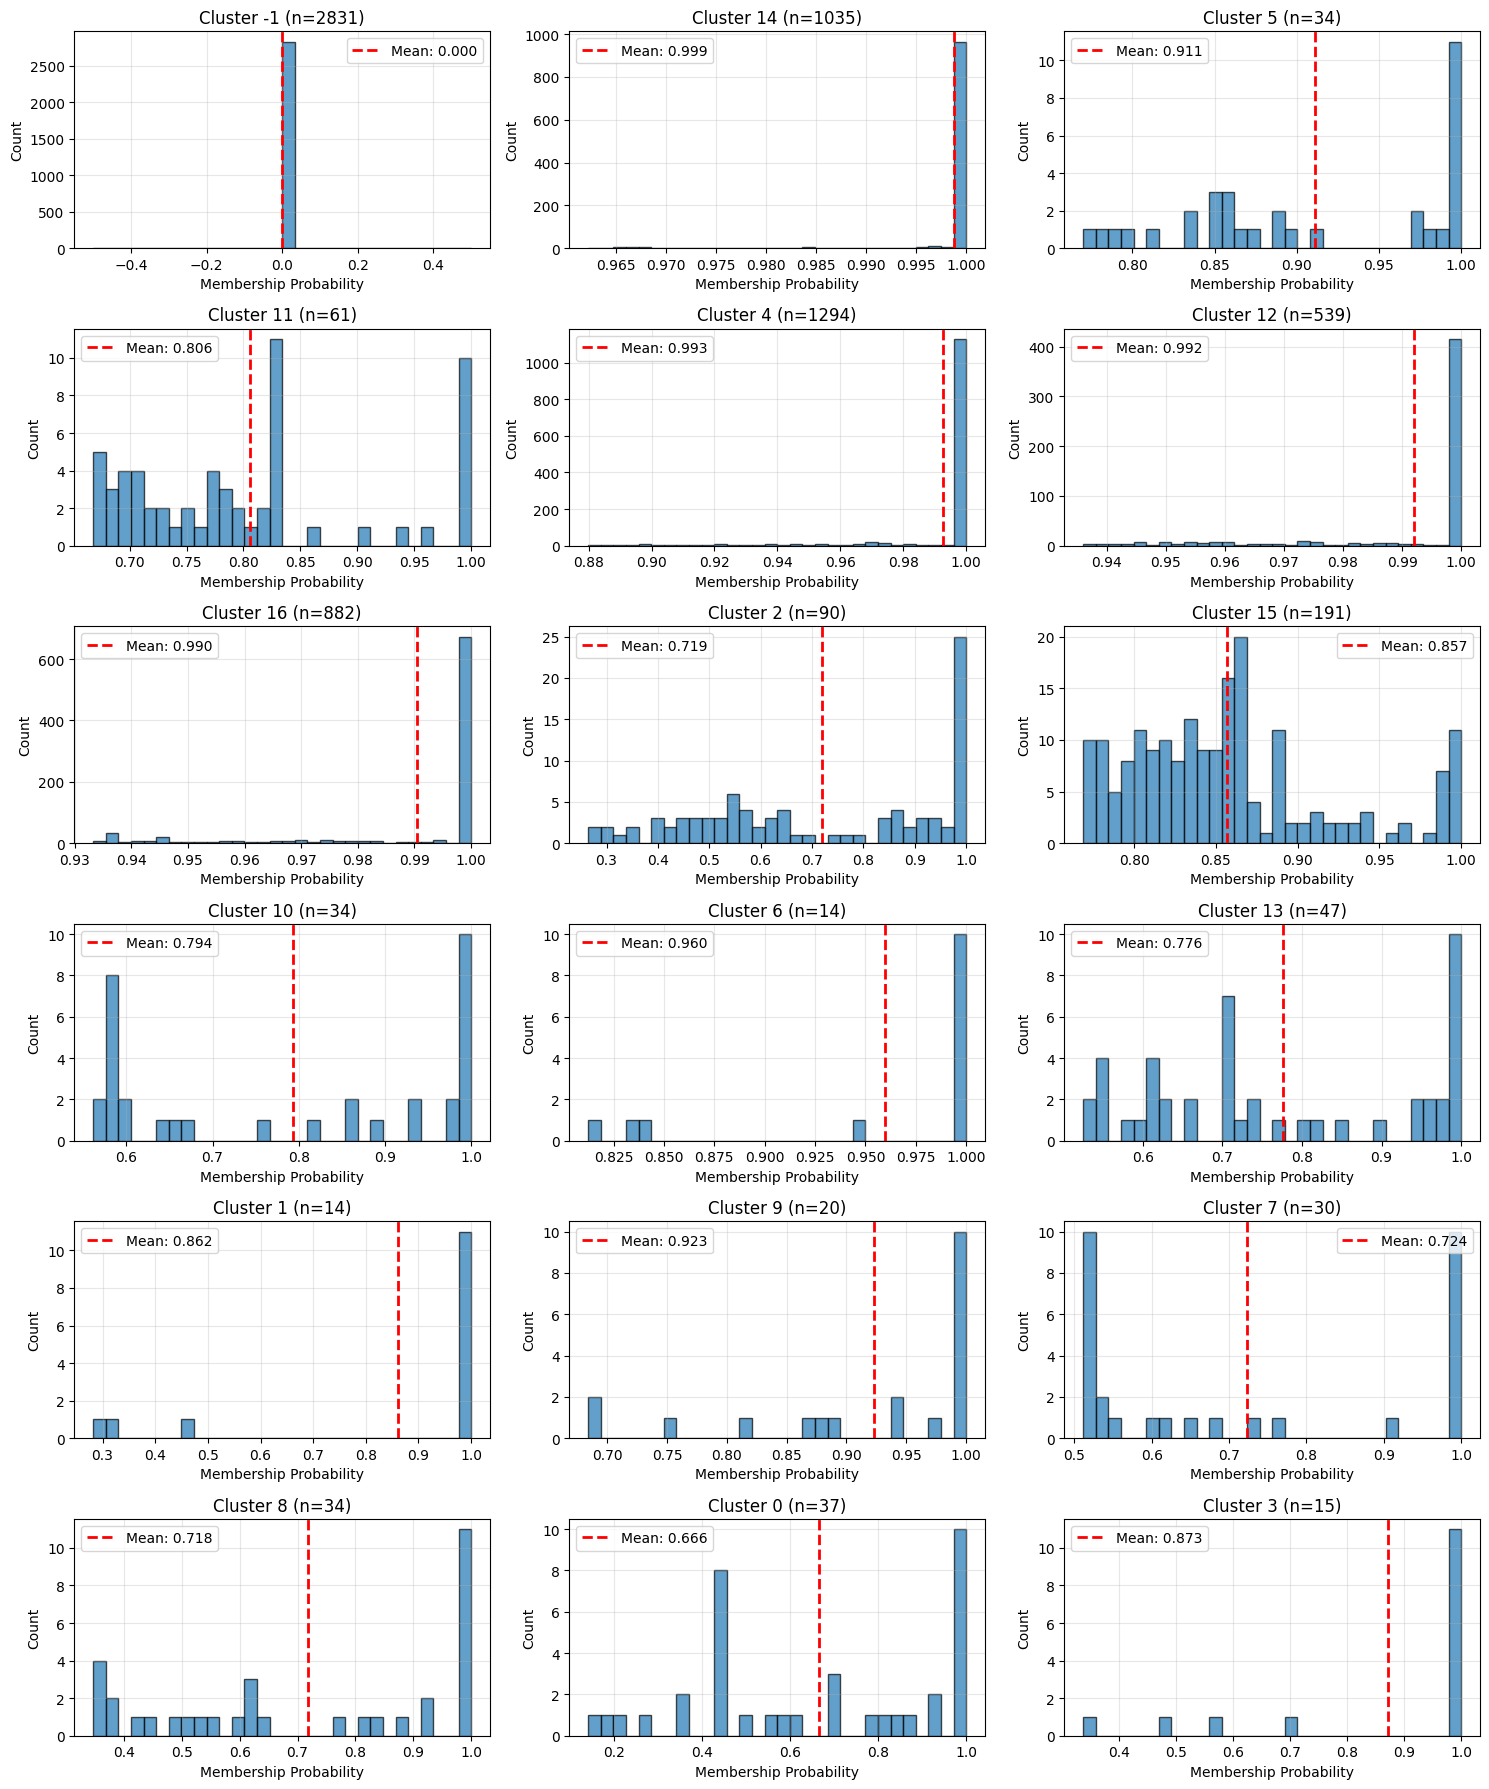

In [16]:
# Create a grid of histograms for each cluster
n_clusters = len(cluster_ids)
n_cols = 3
n_rows = (n_clusters + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

for idx, (cluster_id, probs) in enumerate(zip(cluster_ids, cluster_probs)):
    ax = axes[idx]
    ax.hist(probs, bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(f'Cluster {cluster_id} (n={len(probs)})')
    ax.set_xlabel('Membership Probability')
    ax.set_ylabel('Count')
    ax.grid(alpha=0.3)
    
    # Add mean line
    mean_prob = np.mean(probs)
    ax.axvline(mean_prob, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_prob:.3f}')
    ax.legend()

# Hide extra subplots
for idx in range(len(cluster_ids), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()